# London boroughs Housing Prices

## Objectives

In this notebook, here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York…etc, there are 32 boroughs within Greater London [(here's some further information)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## The Data Science Pipeline

Data Science is magical. In this case study, we'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

We will adhere to the four stages of a typical Data Science Pipeline:

1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Our data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.


**2.1. Exploring the data** 


In [5]:
#Looking at the number of rows and columns
properties.shape

(318, 49)

In [6]:
#Checking the state of the raw dataset
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


**2.2. Cleaning the data**

First, a dataset transposition will be carried out, meaning tha the columns will be flipped into rows and vice versa.

By transposing this DataFrame, then the borough names will become the row indices, and the date time objects will become the column headers. Eeach row will represent a borough and each column will contain data about that borough at a certain point in time.

In [7]:
properties_T=properties.T

**2.3. Cleaning the data (part 2)**

Renaming a couple of columns.

In [8]:
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,827659,798499,836807,769392,801999,760599,729316,717528,713095,765822
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,304924,301702,304852,305012,309560,311007,313836,314187,309681,308760
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,529660,533619,530354,528816,532528,538842,538216,542872,545746,546082
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,346680,345061,345405,346253,352261,356664,360116,364481,365519,368555


In [9]:
properties_T.reset_index(inplace=True)

In [10]:
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,308,309,310,311,312,313,314,315,316,317
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,827659,798499,836807,769392,801999,760599,729316,717528,713095,765822
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304924,301702,304852,305012,309560,311007,313836,314187,309681,308760
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,529660,533619,530354,528816,532528,538842,538216,542872,545746,546082
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,346680,345061,345405,346253,352261,356664,360116,364481,365519,368555


Making sure that column data types are all correct. Average prices, for example, should be floating point numbers... 

In [11]:
properties_T.columns=properties_T.iloc[0]

In [12]:
properties_T=properties_T.drop(0)

In [13]:
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,827659,798499,836807,769392,801999,760599,729316,717528,713095,765822
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304924,301702,304852,305012,309560,311007,313836,314187,309681,308760
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,529660,533619,530354,528816,532528,538842,538216,542872,545746,546082
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,346680,345061,345405,346253,352261,356664,360116,364481,365519,368555
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,497729,519562,522239,513101,495067,511348,514389,519213,498084,508571


In [14]:
properties_T=properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [15]:
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,827659,798499,836807,769392,801999,760599,729316,717528,713095,765822
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304924,301702,304852,305012,309560,311007,313836,314187,309681,308760
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,529660,533619,530354,528816,532528,538842,538216,542872,545746,546082
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,346680,345061,345405,346253,352261,356664,360116,364481,365519,368555
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,497729,519562,522239,513101,495067,511348,514389,519213,498084,508571


In [16]:
#Each row now represents a month and a year and each cell value represents the average price of houses in borough of the corresponding row.

**2.4.Transforming the data**
I would like each column to be a variable while each row will point out to an observation.

In [18]:
clean_properties = pd.melt(properties_T, id_vars=['London_Borough', 'ID'])

In [19]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [20]:
clean_properties=clean_properties.rename(columns = {0:'Month', "value":"Average Price"})

In [21]:
clean_properties.head()

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [22]:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average Price             object
dtype: object

In [23]:
clean_properties['Average Price'] = pd.to_numeric(clean_properties['Average Price'])

In [24]:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average Price            float64
dtype: object

In [25]:
clean_properties.count()

London_Borough    15216
ID                14265
Month             15216
Average Price     14265
dtype: int64

**2.5. Cleaning the data (part 3)**

There are fewer data points in some of the columns. The following will investigate further. 

In [26]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [27]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average Price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [28]:
clean_properties.drop(clean_properties.index[clean_properties['London_Borough'] == 'Unnamed: 34'])

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
15211,LONDON,E12000007,2021-05-01,497947.95890
15212,SOUTH EAST,E12000008,2021-05-01,350015.50720
15213,SOUTH WEST,E12000009,2021-05-01,277602.69830
15214,Unnamed: 47,NaN,2021-05-01,NaN


In [29]:
clean_properties.drop(clean_properties.index[clean_properties['London_Borough'] == 'Unnamed: 37'])

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
15211,LONDON,E12000007,2021-05-01,497947.95890
15212,SOUTH EAST,E12000008,2021-05-01,350015.50720
15213,SOUTH WEST,E12000009,2021-05-01,277602.69830
15214,Unnamed: 47,NaN,2021-05-01,NaN


In [30]:
clean_properties.drop(clean_properties.index[clean_properties['London_Borough'] == 'Unnamed: 47'])

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
15210,EAST OF ENGLAND,E12000006,2021-05-01,310200.25640
15211,LONDON,E12000007,2021-05-01,497947.95890
15212,SOUTH EAST,E12000008,2021-05-01,350015.50720
15213,SOUTH WEST,E12000009,2021-05-01,277602.69830


In [31]:
NaNFreeDF1 = clean_properties[clean_properties['Average Price'].notna()]
NaNFreeDF1.head(48)

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [32]:
NaNFreeDF1.count()

London_Borough    14265
ID                14265
Month             14265
Average Price     14265
dtype: int64

In [33]:
NaNFreeDF2 = clean_properties.dropna()

In [34]:
NaNFreeDF2.count

<bound method DataFrame.count of            London_Borough         ID      Month  Average Price
0          City of London  E09000001 1995-01-01    91448.98487
1      Barking & Dagenham  E09000002 1995-01-01    50460.22660
2                  Barnet  E09000003 1995-01-01    93284.51832
3                  Bexley  E09000004 1995-01-01    64958.09036
4                   Brent  E09000005 1995-01-01    71306.56698
...                   ...        ...        ...            ...
15210     EAST OF ENGLAND  E12000006 2021-05-01   310200.25640
15211              LONDON  E12000007 2021-05-01   497947.95890
15212          SOUTH EAST  E12000008 2021-05-01   350015.50720
15213          SOUTH WEST  E12000009 2021-05-01   277602.69830
15215             England  E92000001 2021-05-01   271433.87070

[14265 rows x 4 columns]>

In [35]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [36]:
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(15216, 4)
(14265, 4)
(14265, 4)


In [37]:
wrong_boroughs = ['Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']

In [38]:
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(wrong_boroughs)]

,London_Borough,ID,Month,Average Price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
15210,EAST OF ENGLAND,E12000006,2021-05-01,310200.25640
15211,LONDON,E12000007,2021-05-01,497947.95890
15212,SOUTH EAST,E12000008,2021-05-01,350015.50720
15213,SOUTH WEST,E12000009,2021-05-01,277602.69830


In [39]:
NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(wrong_boroughs)]

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
15196,Sutton,E09000029,2021-05-01,394980.62790
15197,Tower Hamlets,E09000030,2021-05-01,474143.67540
15198,Waltham Forest,E09000031,2021-05-01,487133.11150
15199,Wandsworth,E09000032,2021-05-01,625412.33880


In [40]:
df = NaNFreeDF2

In [41]:
df.head()

,London_Borough,ID,Month,Average Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [42]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average Price            float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, I will subset on a particular London Borough and do a line plot of Month against Average Price

In [43]:
camden_prices=df[df["London_Borough"]=="Camden"]

Text(0, 0.5, 'Price')

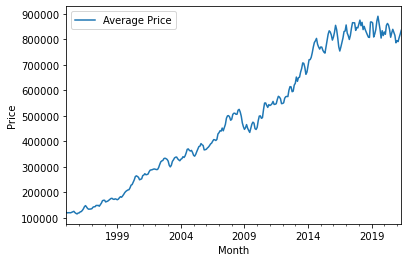

In [44]:
ax=camden_prices.plot(kind='line', x='Month', y = 'Average Price')
ax.set_ylabel("Price")

In order to limit the number of data points I have, I will extract the year from every month value from the *Month* column. 

A lambda function will be used, following the following pattern:

1. Looking through the `Month` column
2. Extracting the year from each individual value in that column 
3. Storing that corresponding year as separate column. 

A reminder of the initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [45]:
df['Year'] = df['Month'].apply(lambda t: t.year)

<ipython-input-45-056d0922c67e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Month'].apply(lambda t: t.year)


In [46]:
df.tail()

,London_Borough,ID,Month,Average Price,Year
15210,EAST OF ENGLAND,E12000006,2021-05-01,310200.2564,2021
15211,LONDON,E12000007,2021-05-01,497947.9589,2021
15212,SOUTH EAST,E12000008,2021-05-01,350015.5072,2021
15213,SOUTH WEST,E12000009,2021-05-01,277602.6983,2021
15215,England,E92000001,2021-05-01,271433.8707,2021


In [47]:
dfg=df.groupby(by=['London_Borough', 'Year']).mean()

In [48]:
dfg.sample(10)

,,Average Price
London_Borough,Year,
Merton,1997,95699.209073
SOUTH EAST,2008,222310.651458
City of London,2005,311783.670592
Bexley,2015,274209.280967
Tower Hamlets,2016,457129.597725
Hammersmith & Fulham,2010,502256.960300
WEST MIDLANDS,2000,67872.316249
Hammersmith & Fulham,1999,198901.180225
SOUTH WEST,2001,100811.321731


**3. Modeling**

Creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

This function will be called: create_price_ratio.

The following steps will be undertaken: 

1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. 

2. Get the Average Price for that Borough, for the years 1998 and 2018.

4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.

5. Return that ratio.

Then, iterating through all the unique London_Boroughs and working out the ratio capturing the difference of house prices between 1998 and 2018 will be carried out.


In [49]:
dfg.reset_index(inplace=True)

In [50]:
dfg.query('London_Borough == "Barking & Dagenham"')

,London_Borough,Year,Average Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441
5,Barking & Dagenham,2000,77549.513290
6,Barking & Dagenham,2001,88664.058223
7,Barking & Dagenham,2002,112221.912482
8,Barking & Dagenham,2003,142498.927800
9,Barking & Dagenham,2004,158175.982483


In [51]:
def create_price_ratio(d):
    y1998 = float(d['Average Price'][d['Year'] == 1998])
    y2018 = float(d['Average Price'][d['Year'] == 2018])
    ratio = [y2018/y1998]
    return ratio

In [52]:
create_price_ratio(dfg[dfg['London_Borough'] == 'Barking & Dagenham'])

[4.89661861291754]

In [53]:
final={}

In [63]:
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough']==b]
    final[b]=create_price_ratio(borough)
print(final)

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.0947846853338765], 'Camden': [4.935353408884261], 'City of London': [5.301620377587609], 'Croydon': [4.201100280024767], 'EAST MIDLANDS': [3.6327346720877034], 'EAST OF ENGLAND': [4.166900547724156], 'Ealing': [4.311450902121834], 'Enfield': [4.26347158349581], 'England': [3.8104529783974], 'Greenwich': [4.763036347329193], 'Hackney': [6.198285561008662], 'Hammersmith & Fulham': [4.137798101936229], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335308], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Inner London': [5.170857506254785], 'Islington': [4.844048012802298], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'LONDON': [4.679776249632861], 'Lambeth': [4.957751163514063], 'Lewisham': [5.449221041059685], 'Merton': [4.7412733132

In [64]:
df_ratios=pd.DataFrame(final)

In [65]:
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,EAST MIDLANDS,EAST OF ENGLAND,...,SOUTH EAST,SOUTH WEST,Southwark,Sutton,Tower Hamlets,WEST MIDLANDS,Waltham Forest,Wandsworth,Westminster,YORKS & THE HUMBER
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,5.30162,4.2011,3.632735,4.166901,...,3.828388,3.795497,5.516485,4.118523,4.626701,3.311262,5.834756,4.757709,5.353565,3.356065


In [66]:
df_ratios_T=df_ratios.T

In [67]:
df_ratios=df_ratios_T.reset_index()

In [68]:
df_ratios.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [69]:
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [70]:
top15 = df_ratios.sort_values(by='2018', ascending=False).head(15)
print(top15)

                 Borough      2018
14               Hackney  6.198286
41        Waltham Forest  5.834756
37             Southwark  5.516485
27              Lewisham  5.449221
43           Westminster  5.353565
31                Newham  5.305390
6         City of London  5.301620
21          Inner London  5.170858
16              Haringey  5.134625
23  Kensington & Chelsea  5.082465
26               Lambeth  4.957751
5                 Camden  4.935353
0     Barking & Dagenham  4.896619
3                  Brent  4.894554
22             Islington  4.844048


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Inner London'),
 Text(8, 0, 'Haringey'),
 Text(9, 0, 'Kensington & Chelsea'),
 Text(10, 0, 'Lambeth'),
 Text(11, 0, 'Camden'),
 Text(12, 0, 'Barking & Dagenham'),
 Text(13, 0, 'Brent'),
 Text(14, 0, 'Islington')]

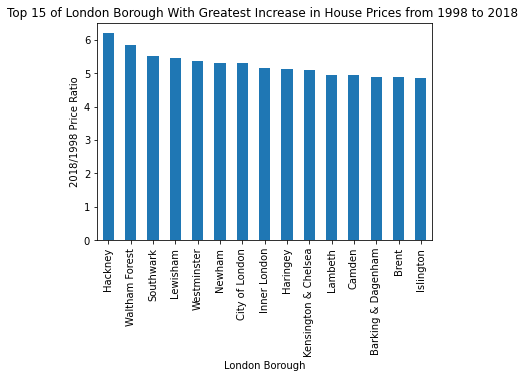

In [81]:
ax = top15[['Borough','2018']].plot(kind='bar', title="Top 15 of London Borough With Greatest Increase in House Prices from 1998 to 2018 ", xlabel="London Borough", ylabel="2018/1998 Price Ratio", legend=False)
ax.set_xticklabels(top15.Borough)

In [82]:
bottom15 = df_ratios.sort_values(by='2018', ascending=False).tail(15)
print(bottom15)

                 Borough      2018
9        EAST OF ENGLAND  4.166901
15  Hammersmith & Fulham  4.137798
38                Sutton  4.118523
4                Bromley  4.094785
17                Harrow  4.059196
34  Richmond upon Thames  4.005162
20              Hounslow  3.976409
35            SOUTH EAST  3.828388
12               England  3.810453
36            SOUTH WEST  3.795497
8          EAST MIDLANDS  3.632735
30            NORTH WEST  3.363416
44    YORKS & THE HUMBER  3.356065
40         WEST MIDLANDS  3.311262
29            NORTH EAST  2.828081


[Text(0, 0, 'EAST OF ENGLAND'),
 Text(1, 0, 'Hammersmith & Fulham'),
 Text(2, 0, 'Sutton'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Harrow'),
 Text(5, 0, 'Richmond upon Thames'),
 Text(6, 0, 'Hounslow'),
 Text(7, 0, 'SOUTH EAST'),
 Text(8, 0, 'England'),
 Text(9, 0, 'SOUTH WEST'),
 Text(10, 0, 'EAST MIDLANDS'),
 Text(11, 0, 'NORTH WEST'),
 Text(12, 0, 'YORKS & THE HUMBER'),
 Text(13, 0, 'WEST MIDLANDS'),
 Text(14, 0, 'NORTH EAST')]

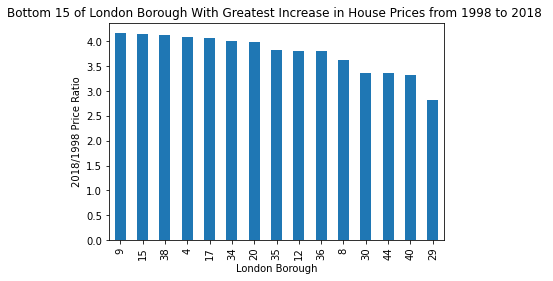

In [83]:
ax2 = bottom15[['Borough','2018']].plot(kind='bar', title="Bottom 15 of London Borough With Greatest Increase in House Prices from 1998 to 2018 ", xlabel="London Borough", ylabel="2018/1998 Price Ratio", legend=False)
ax.set_xticklabels(bottom15.Borough)

### 4. Conclusion

- Hackney has shown the greatest price change among all of the London boroughs with ~6.2% when comparing 1995 with 2018.

- From 1995 until 2015, Hackney has shown the highest demands due to:
    - Affordability: Low house prices compared to other London Boroughs (Affordable to the middle class).
    - Easy Access to the city of London.
    - Explosion of new developments and boutique-style businesses.
    - Big demand spike in 2012 only in Hackney, after the 2008 Financial crisis, mainly because it was one of the 5 cities in London hosting the Olympic Games in 2012.

- From 2015 to date, all London borough have shown a decline in house sales:

After analyzing both the Average Price and the Sales Volume sheets we can conclude that when the demand curve for housing increases, so too do prices. It makes sense: If more people want something that is available for purchase (low supply), then they are willing to pay more for that product. As prices increase, demand generally drops, as affordability decreases.

- There are so many factors that can affect the supply and demand for housing, and many aren't economic in nature.

Consider the current COVID-19 pandemic, which grounded constructions, paused home sales for a period, and caused building materials to be intermittently (un)available. That certainly put significant downward pressure on housing supply and demand. Or, consider a local government that wants to encourage urban growth and opens up new urban land for development that will increase supply as inward migration increases demand. So as a conclusion, we can not look at only the price increase change without looking at many different factors that affect housing market supply and demand like in our example the Sale volumes.
